#Inicio

Começaremos instalando e importando as bibliotecas necessárias para o uso.

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 12.7 MB/s 
     |████████████████████████████████| 179 kB 66.7 MB/s 
     |████████████████████████████████| 73 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.4 which is incompatible.


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from sklearn import metrics
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import numpy as np

# Tratamento de dados
Faz o tratamento e a exibição de dados

Dataframe do csv. Enviar o csv para a área de arquivos sempre que abrir o notebook.

In [ ]:
df = pd.read_csv('DadosDefinitivos_filtrados.csv')
df.head()

,Unnamed: 0,TIME_STAMP,RAD_GLO,TEM_INS,UMD_INS
0,0,2021-06-09 00:00:00,-0.1,24.8,99.0
1,1,2021-06-09 01:00:00,-1.1,24.6,100.0
2,2,2021-06-09 02:00:00,-2.0,24.4,89.0
3,3,2021-06-09 03:00:00,-1.7,24.4,89.0
4,4,2021-06-09 04:00:00,-1.9,24.3,89.0


In [ ]:
df.loc[df.UMD_INS>100,'UMD_INS']=100

Seleção das futuras colunas de data a serem nomeadas (ds) e (y)

In [ ]:
df=df[["TIME_STAMP","UMD_INS"]]
df.head()

,TIME_STAMP,UMD_INS
0,2021-06-09 00:00:00,99.0
1,2021-06-09 01:00:00,100.0
2,2021-06-09 02:00:00,89.0
3,2021-06-09 03:00:00,89.0
4,2021-06-09 04:00:00,89.0


Atribuição das variáveis às colunas que são exigidas pelo Prophet

In [ ]:
df.columns = ['ds','y']

Avaliação de conteúdo sem dados das colunas

Geração de um período para teste e para treino

In [ ]:
treino=df.iloc[:8711]
test=df.iloc[8712:]

#treino=df.iloc[0:47]
#test=df.iloc[48:95]

In [ ]:
df.iloc[8712]

ds    2022-06-07 00:00:00
y                    98.0
Name: 8712, dtype: object

In [ ]:
test.head(25)

,ds,y
8712,2022-06-07 00:00:00,98.0
8713,2022-06-07 01:00:00,98.0
8714,2022-06-07 02:00:00,98.0
8715,2022-06-07 03:00:00,98.0
8716,2022-06-07 04:00:00,98.0
8717,2022-06-07 05:00:00,98.0
8718,2022-06-07 06:00:00,98.0
8719,2022-06-07 07:00:00,98.0
8720,2022-06-07 08:00:00,99.0
8721,2022-06-07 09:00:00,98.0


In [ ]:
test


,ds,y
8712,2022-06-07 00:00:00,98.0
8713,2022-06-07 01:00:00,98.0
8714,2022-06-07 02:00:00,98.0
8715,2022-06-07 03:00:00,98.0
8716,2022-06-07 04:00:00,98.0
...,...,...
8779,2022-06-09 19:00:00,74.0
8780,2022-06-09 20:00:00,96.0
8781,2022-06-09 21:00:00,97.0
8782,2022-06-09 22:00:00,97.0


# Previsão de dados

Comandos para a previsão de dados

Incialmente vamos dividir esses dados em um período de treino e o período de teste, para então fazer a execução dos comandos. Os dados são coletados diariamente e a cada hora no período de um ano entre 03/2021 e 03/2022



Instanciando o o prophet e fazendo o treino

In [ ]:
m = Prophet()
m.fit(treino)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
m.make_future_dataframe

<bound method Prophet.make_future_dataframe of <fbprophet.forecaster.Prophet object at 0x7fd6aa280ad0>>

In [ ]:
future = m.make_future_dataframe(793, include_history=False,freq='H')
future.tail(24)

,ds
769,2022-07-09 00:00:00
770,2022-07-09 01:00:00
771,2022-07-09 02:00:00
772,2022-07-09 03:00:00
773,2022-07-09 04:00:00
774,2022-07-09 05:00:00
775,2022-07-09 06:00:00
776,2022-07-09 07:00:00
777,2022-07-09 08:00:00
778,2022-07-09 09:00:00


In [ ]:
f=m.predict(future)

In [ ]:
f.loc[f.yhat>100,'yhat']=100

In [ ]:
f[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
769,2022-07-09 00:00:00,92.327838,82.331742,102.100284
770,2022-07-09 01:00:00,92.957795,83.088304,102.133480
771,2022-07-09 02:00:00,93.835794,84.299778,103.594606
772,2022-07-09 03:00:00,94.784764,85.246995,104.489315
773,2022-07-09 04:00:00,95.405227,85.845951,104.833507
774,2022-07-09 05:00:00,95.620204,85.733423,105.047315
775,2022-07-09 06:00:00,95.834036,85.807152,105.638356
776,2022-07-09 07:00:00,96.462256,87.486671,105.807546
777,2022-07-09 08:00:00,97.264875,87.280295,106.774869
778,2022-07-09 09:00:00,97.200907,88.119576,106.170432


In [ ]:
ypred = m.predict(test)

#Validação de dados

Validação cruzada

In [ ]:
print('MAE: {}'.format(metrics.mean_absolute_error(test['y'].values, ypred['yhat'].values)))

MAE: 4.008105905623118


In [ ]:
print('MASE: {}'.format(metrics.mean_absolute_percentage_error(test['y'].values, ypred['yhat'].values)))

MASE: 0.05087305449355358


In [ ]:
f = f.rename(columns={'yhat': 'UMD_INS'})
d=f[['ds','UMD_INS']].iloc[769:]
d.to_csv('umidade001')
d

,ds,UMD_INS
769,2022-07-09 00:00:00,92.327838
770,2022-07-09 01:00:00,92.957795
771,2022-07-09 02:00:00,93.835794
772,2022-07-09 03:00:00,94.784764
773,2022-07-09 04:00:00,95.405227
774,2022-07-09 05:00:00,95.620204
775,2022-07-09 06:00:00,95.834036
776,2022-07-09 07:00:00,96.462256
777,2022-07-09 08:00:00,97.264875
778,2022-07-09 09:00:00,97.200907


In [ ]:
#f.to_csv('UMD')

In [ ]:
ypred['yhat'].describe

<bound method NDFrame.describe of 0     92.279242
1     92.902344
2     93.773370
3     94.715289
4     95.328685
        ...    
67    81.679479
68    84.928048
69    88.112685
70    90.574813
71    92.006285
Name: yhat, Length: 72, dtype: float64>

In [ ]:
test['y'].describe

<bound method NDFrame.describe of 8712    98.0
8713    98.0
8714    98.0
8715    98.0
8716    98.0
        ... 
8779    74.0
8780    96.0
8781    97.0
8782    97.0
8783    96.0
Name: y, Length: 72, dtype: float64>

In [ ]:
test.shape, treino.shape

((72, 2), (8711, 2))

Gráficos comparando y e yhat

Outros modelos de gráficos

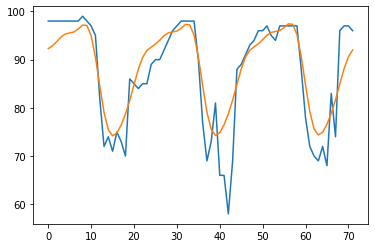

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(test.y)),test.y)
plt.plot(range(len(ypred.yhat)),ypred.yhat)
#na.fill

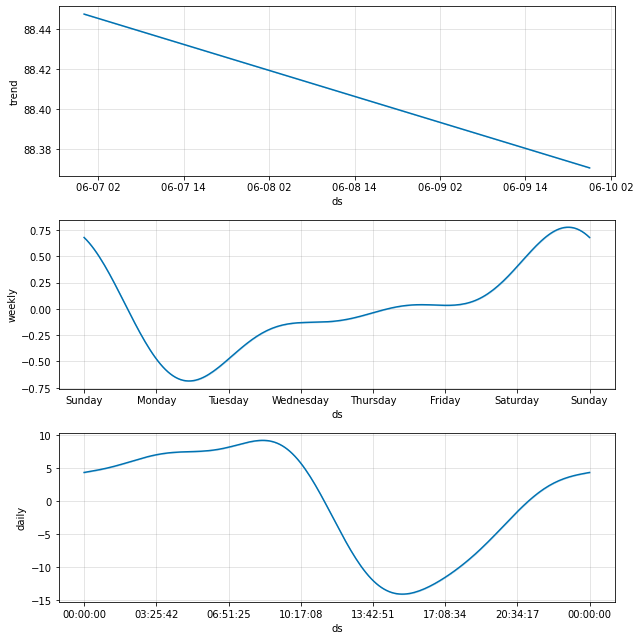

In [ ]:
cm=m.plot_components(ypred)

In [ ]:
#ypred.set_index('ds')['yhat'].plot(color='pink')
#test.set_index('ds')['y'].plot(color='green')

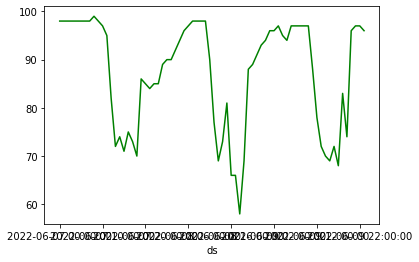

In [ ]:

test.set_index('ds')['y'].plot(color='green')

# Trasformação de dados

Geração de um agrupamento de colunas capaz de receber os valores de RAD_GLO 	TEM_INS 	UMD_INS 	

Conversão do Dataframe com os dados acima do dia 10-06-2022 para um arquivo .csv